In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import grad
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import time

# LOADS PRE-EXISTING NET

Weights can be found at https://drive.google.com/drive/folders/1fn83DF14tWmit0RTKWRhPq5uVXt73e0h put into data folder

In [3]:
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
## load mnist dataset
use_cuda = torch.cuda.is_available()

root = './data'
if not os.path.exists(root):
    os.mkdir(root)
    
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
# if not exist, download mnist dataset
train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=root, train=False, transform=trans, download=True)

batch_size = 100

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)

use_cuda = False
epsilons = [0, .05, .1, .15, .2, .25, .3]
pretrained_model = "data/lenet_mnist_model.pth"

criterion = nn.CrossEntropyLoss()

# LeNet Model definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x
    
# Initialize the network
model = Net()

# Load the pretrained model
model.load_state_dict(torch.load(pretrained_model, map_location='cpu'))

# Set the model in evaluation mode. In this case this is for the Dropout layers
model.eval()

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

# TRAINS NEW NET DO NOT RUN

In [3]:


# print '==>>> total trainning batch number: {}'.format(len(train_loader))
# print '==>>> total testing batch number: {}'.format(len(test_loader))

## network
class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def name(self):
        return "MLP"

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def name(self):
        return "LeNet"

## training
model = LeNet()

if use_cuda:
    model = model.cuda()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = nn.CrossEntropyLoss()

for epoch in range(4):
    # trainning
    ave_loss = 0
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        if use_cuda:
            x, target = x.cuda(), target.cuda()
        x, target = Variable(x), Variable(target)
        out = model(x)
        loss = criterion(out, target)
        ave_loss = ave_loss * 0.9 + loss.data.item() * 0.1
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print("Epoch", epoch)
#             print '==>>> epoch: {}, batch index: {}, train loss: {:.6f}'.format(
#                 epoch, batch_idx+1, ave_loss)
    # testing
#     correct_cnt, ave_loss = 0, 0
#     total_cnt = 0
#     for batch_idx, (x, target) in enumerate(test_loader):
#         if use_cuda:
#             x, target = x.cuda(), target.cuda()
#         x, target = Variable(x, volatile=True), Variable(target, volatile=True)
#         out = model(x)
#         loss = criterion(out, target)
#         _, pred_label = torch.max(out.data, 1)
#         total_cnt += x.data.size()[0]
#         correct_cnt += (pred_label == target.data).sum()
#         # smooth average
#         ave_loss = ave_loss * 0.9 + loss.data[0] * 0.1
        
#         if(batch_idx+1) % 100 == 0 or (batch_idx+1) == len(test_loader):
#             print("Epoch", epoch)
# #             print '==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
# #                 epoch, batch_idx+1, ave_loss, correct_cnt * 1.0 / total_cnt)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch 0
Epoch 0
Epoch 0
Epoch 0
Epoch 0
Epoch 0
Epoch 1
Epoch 1
Epoch 1
Epoch 1
Epoch 1
Epoch 1
Epoch 2
Epoch 2
Epoch 2
Epoch 2
Epoch 2
Epoch 2
Epoch 3
Epoch 3
Epoch 3
Epoch 3
Epoch 3
Epoch 3


In [14]:
correct_cnt, ave_loss = 0, 0
total_cnt = 0
epoch = 0
for batch_idx, (x, target) in enumerate(test_loader):
    if use_cuda:
        x, target = x.cuda(), target.cuda()
    x, target = Variable(x, volatile=True), Variable(target, volatile=True)
    out = model(x)
    loss = criterion(out, target)
    _, pred_label = torch.max(out.data, 1)
    total_cnt += x.data.size()[0]
    correct_cnt += (pred_label == target.data).sum()
    # smooth average
    ave_loss = ave_loss * 0.9 + loss.data.item() * 0.1

    if(batch_idx+1) % 100 == 0 or (batch_idx+1) == len(test_loader):
        print("Epoch", epoch)
        print(correct_cnt, total_cnt)
#             print '==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
#                 epoch, batch_idx+1, ave_loss, correct_cnt * 1.0 / total_cnt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  import sys


Epoch 0
tensor(9759) 10000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


tensor(0.8655, grad_fn=<MaxBackward0>) tensor(7)
tensor(0.6084, grad_fn=<MaxBackward0>) tensor(6)
tensor(0.8731, grad_fn=<MaxBackward0>) tensor(3)
tensor(0.3233, grad_fn=<MaxBackward0>) tensor(4)
tensor(0.5727, grad_fn=<MaxBackward0>) tensor(2)
tensor(0.9881, grad_fn=<MaxBackward0>) tensor(3)
tensor(0.8021, grad_fn=<MaxBackward0>) tensor(6)
tensor(0.6671, grad_fn=<MaxBackward0>) tensor(1)
tensor(0.4564, grad_fn=<MaxBackward0>) tensor(8)
tensor(0.3371, grad_fn=<MaxBackward0>) tensor(1)
tensor(0.7394, grad_fn=<MaxBackward0>) tensor(9)
tensor(0.8261, grad_fn=<MaxBackward0>) tensor(7)
tensor(0.3129, grad_fn=<MaxBackward0>) tensor(8)
tensor(0.6217, grad_fn=<MaxBackward0>) tensor(4)
tensor(0.7918, grad_fn=<MaxBackward0>) tensor(6)
tensor(0.3431, grad_fn=<MaxBackward0>) tensor(3)
tensor(0.8199, grad_fn=<MaxBackward0>) tensor(3)
torch.Size([1, 1, 28, 28])
torch.Size([1])


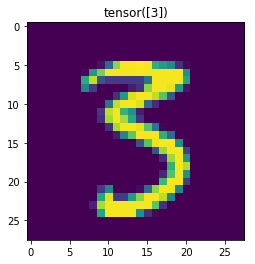

In [5]:
index = 17
for counter, (img, label) in enumerate(test_loader):
    if counter == index:
        break
    predict = model(img)
    predict = torch.nn.functional.softmax(predict)
    predict_vect, predict_label = torch.max(predict[0], 0)
    print(predict_vect, predict_label)
    loss = criterion(predict, label)
    source_img = img[0, 0]
    source_label = label[0]

source_img = source_img.reshape(1, 1, 28, 28)
source_label = source_label.reshape(1)
print(source_img.shape)
print(source_label.shape)
fig, ax = plt.subplots()
ax.set_title(source_label)
ax.imshow(source_img[0, 0])

Initial Loss: tensor([[-1.3690, -1.1730, -0.9963,  4.3279, -1.9200,  2.4601, -2.4292, -0.8065,
          0.3987,  0.6069]], grad_fn=<ThAddmmBackward>)
Init Adv: tensor([[-1.5082, -1.4389, -1.4346,  4.5284, -1.8185,  2.9503, -2.4319, -1.0878,
          0.5954,  0.9239]], grad_fn=<ThAddmmBackward>)
torch.Size([1, 1, 28, 28]) torch.Size([1])
0.0%
0.23666810989379883
A_NL VAL: -0.11031229048967361
TIME TAKEN: 0.010431289672851562

1.25%
0.24251604080200195
A_NL VAL: -0.11284269392490387
TIME TAKEN: 0.0049152374267578125

2.5%
0.24860000610351562
A_NL VAL: -0.11547385901212692
TIME TAKEN: 0.00471806526184082

3.75%
0.2549309730529785
A_NL VAL: -0.1181730255484581
TIME TAKEN: 0.0037431716918945312

5.0%
0.2615175247192383
A_NL VAL: -0.12096373736858368
TIME TAKEN: 0.007585287094116211

6.25%
0.2683892250061035
A_NL VAL: -0.12390315532684326
TIME TAKEN: 0.004135608673095703

7.5%
0.2755413055419922
A_NL VAL: -0.12699423730373383
TIME TAKEN: 0.003490924835205078

8.75%
0.28293609619140625
A_NL

Text(0.5,1,'5 71.0%')

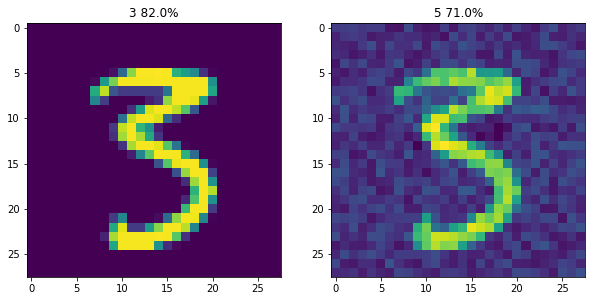

In [8]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        return x


class MyBCE(nn.Module):
    def __init__(self):
        super(MyBCE, self).__init__()
        
    def forward(self, p, y):
        return -1*(y * torch.log(p) + (1 - y) * torch.log(1 - p))
# df_loss = DiffLoss(F.BCELoss())

N = model # initialize sigmoid layer

a = torch.autograd.Variable(source_img, requires_grad = True)
y = torch.autograd.Variable(source_label, requires_grad = False)
x = torch.autograd.Variable(torch.rand(1, 1, 28, 28)*0.3, requires_grad = True)
# w = 1*np.array([4 , 3])
# b = 0

# w = torch.Tensor([[4, 2]])
# b = torch.Tensor([0])
# N.fc1.weight.data = w
# N.fc1.bias.data = b

# x = torch.autograd.Variable(torch.Tensor([0, 1]), requires_grad=True) # give some random input
# a = torch.autograd.Variable(torch.Tensor([0., 2]), requires_grad=True) # give some random input
# y = torch.autograd.Variable(torch.Tensor([1]), requires_grad=False) # give some random input

print("Initial Loss:", N(a))
print("Init Adv:", N(a + x))
print(a.shape, y.shape)
loss_fn = criterion

# TWEAK learning rate (lr) and # of epochs (num_epochs) to generate better result
lr = 0.01
num_epochs = 4000
optimizer = optim.SGD([x], lr=0.001)
for epoch in range(num_epochs):
    t1 = time.time()
    N.zero_grad()
    optimizer.zero_grad()
#     loss_diff.zero_grad()
    
    loss_adv = loss_fn(N(a + x), y)
    loss_source = loss_fn(N(a), y)

    loss_diff = torch.abs(loss_adv - loss_source) / torch.norm(x)
    grads = grad(loss_diff, x, create_graph=True)
    A_NL = -1*torch.norm(grads[0])
    
    grads = A_NL.backward()
    
    if epoch % 50 == 0:
#         lr_val = torch.norm(grads)
        print(str(100*(epoch // 50)*(50/num_epochs))+"%")
        print(loss_adv.item())
        print("A_NL VAL:", A_NL.item())
#         print("NEW LR", np.log(1 / lr_val))
#         print("GRAD VAL:", np.log(1 / lr_val)*lr)
        print("TIME TAKEN:", time.time() - t1)
        print()
#     x = x - lr*grads
    optimizer.step()
    
#     lr = torch.abs(5 + 4*A_NL)
print((x + a).shape)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

result_original = torch.nn.functional.softmax(N(a)[0], dim=0)
predict_vect_original, predict_label_original = torch.max(result_original, 0)
predict_vect_original = round(predict_vect_original.item(), 2)

result = torch.nn.functional.softmax(N(x + a)[0], dim=0)
predict_vect, predict_label = torch.max(result, 0)
predict_vect = round(predict_vect.item(), 2)

print(predict_vect)
print("NEW LABEL", predict_label)
print()
ax[0].imshow((a)[0, 0].data)
ax[1].imshow((x + a)[0, 0].data)
ax[0].set_title(str(y.item())+" "+str(predict_vect_original*100)+"%")
ax[1].set_title(str(predict_label.item())+" "+str(predict_vect*100)+"%")
# model.zero_grad()
# loss_hess.backward()

# print("Adv Loss:", loss_adv)
# print("Source Loss:", loss_source)
# print("AL Val:", x.grad)
